In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
import h5py

In [2]:
# sp.integrate.odeint

In [3]:
Ns=32
Nt=8

In [6]:
# mass="0p1000"
# ibeta_m = 0
# ibeta_M = 830

mass="0p2000"
ibeta_m = 768
ibeta_M = 830

# mass="0p3000"
# ibeta_m = 200
# ibeta_M = 700

# mass="0p4000"
# ibeta_m = 400
# ibeta_M = 1000

In [7]:
ibetas=np.arange(0, 1001)

In [8]:
directory = "fit_params_32c_m"+mass+"/"
directory2 = "/mnt/hdd_barracuda/llnl/reweight/data/32b_v12/"
f = h5py.File(directory2+"/m"+mass+"avghist_ibx"+str(0)+"_iby"+str(0)+"_nojkmeas.bin", 'r')
betas = f['beta'][()]
f.close()

In [9]:
lis_=[]

for ibeta in ibetas:
    tmp = np.loadtxt( directory+"minima_data_"+str(ibeta)+".dat" )
    lis_.append(tmp)

lis = np.array(lis_)

In [10]:
ibetac = np.argmin( ( (lis.T[2]- lis.T[3])**2 )[ibeta_m:ibeta_M] ) + ibeta_m

In [18]:
np.argmin( (betas-10.945)**2 )

300

In [16]:
np.argmin(betas-10.945)

0

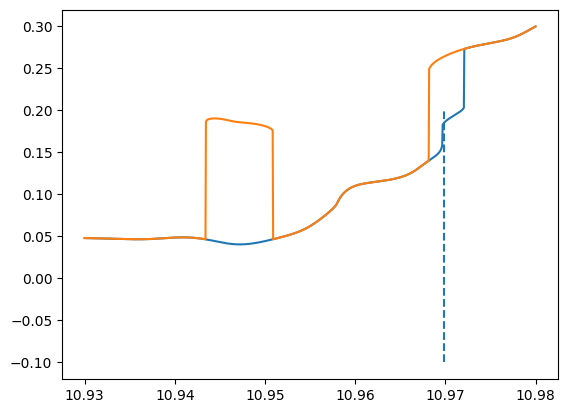

In [11]:
plt.plot( betas, lis.T[0])
plt.plot( betas, lis.T[1] )
plt.vlines( (betas[ibetac]), -0.1, 0.2, ls='dashed' )

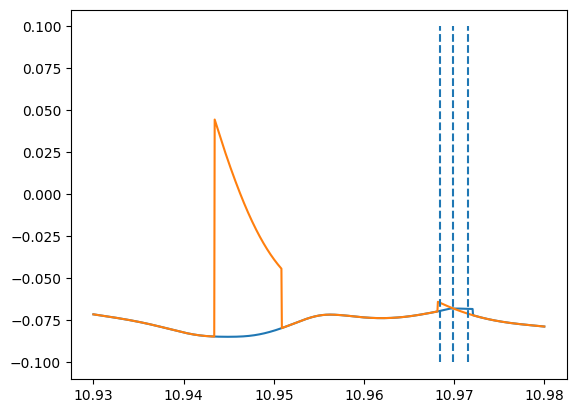

In [19]:
plt.plot( betas, lis.T[2])
plt.plot( betas, lis.T[3] )
plt.vlines( (betas[ibeta_m], betas[ibeta_M]), -0.1, 0.1, ls='dashed' )
plt.vlines( (betas[ibetac]), -0.1, 0.1, ls='dashed' )

In [13]:
ibeta_m, ibetac, ibeta_M

(768, 798, 830)

In [14]:
np.savetxt( "betac_ibetac_mass"+mass+".dat", [betas[ibetac], ibetac] )
np.savetxt( "betas_mass"+mass+".dat", betas )
np.savetxt( "minima_data_mass"+mass+".dat", lis )

In [7]:
def fitter( x, CB, alphaA, alphaB, gammaA, gammaB, vol=(Ns/Nt)**3 ):
    VA = 0.5*alphaA * (x-xA)**2 + 0.25*gammaA * (x-xA)**4
    VB = 0.5*alphaB * (x-xB)**2 + 0.25*gammaB * (x-xB)**4
    return np.exp( - VA ) + CB * np.exp( - VB )

def dfitter( x, CB, alphaA, alphaB, gammaA, gammaB, vol=(Ns/Nt)**3 ):
    VA = 0.5*alphaA * (x-xA)**2 + 0.25*gammaA * (x-xA)**4
    dVA = alphaA * (x-xA) + gammaA * (x-xA)**3
    VB = 0.5*alphaB * (x-xB)**2 + 0.25*gammaB * (x-xB)**4
    dVB = alphaB * (x-xB) + gammaB * (x-xB)**3
    return - ( np.exp( - VA )*dVA + CB * np.exp( - VB )*dVB )

In [8]:
# def fitter( x, CB, alphaA, alphaB ):
#     VA = 0.5*alphaA * (x-xA)**2
#     VB = 0.5*alphaB * (x-xB)**2
#     return np.exp( - VA ) + CB * np.exp( - VB )

# def dfitter( x, CB, alphaA, alphaB ):
#     VA = 0.5*alphaA * (x-xA)**2
#     dVA = alphaA * (x-xA)
#     VB = 0.5*alphaB * (x-xB)**2
#     dVB = alphaB * (x-xB)
#     return - np.exp( - VA )*dVA - CB * np.exp( - VB )*dVB

In [9]:
def V(x):
    return -1.0/(Ns/Nt)**3 * np.log( fitter(x, ps[0], ps[1], ps[2], ps[3], ps[4]) )
    # return -1.0/(Ns/Nt)**3 * np.log( fitter(x, ps[0], ps[1], ps[2]) )

In [10]:
def dV(x):
    ppp = fitter(x, ps[0], ps[1], ps[2], ps[3], ps[4])
    dppp = dfitter(x, ps[0], ps[1], ps[2], ps[3], ps[4])
    # ppp = fitter(x, ps[0], ps[1], ps[2])
    # dppp = dfitter(x, ps[0], ps[1], ps[2])

    return -1.0/(Ns/Nt)**3 * dppp/ppp

In [11]:
# def quad( x, a0, a1, a2 ):
#     return a0 + a1*x + a2*x*x

# def dquad( x, a0, a1, a2 ):
#     return a1 + 2.0*a2*x

In [12]:
def fff( x, a0, a1, a2 ):
    return a0 + a1/np.abs(x-betac) + a2/np.abs(x-betac)**2
    # return a0 + a2/np.abs(x-betac)**2
    
    

def dfff( x, a0, a1, a2 ):
    return -a1/np.abs(x-betac)**2 -2.0 * a2/np.abs(x-betac)**3
    # return -2.0 * a2/np.abs(x-betac)**3

In [13]:
ibeta_star03 = 464

In [14]:
mass="0p3000"
directory = "fit_params_32c_m"+mass+"/"

In [15]:
# m=0.3
ibetamin = 360
ibetamax = 486 # 474

dibeta = 2

ibetas=np.arange(ibetamin,ibetamax, dibeta)

In [16]:
Scls_=[]

# for ibeta in np.arange(416,460+1, 4):
# for ibeta in np.arange(444,464+1, 2):
for ibeta in ibetas:
    scl = np.loadtxt( directory+"Scl_"+str(ibeta)+".dat" )
    Scls_.append([int(ibeta), scl[()] ] )

Scls03 = np.array(Scls_)

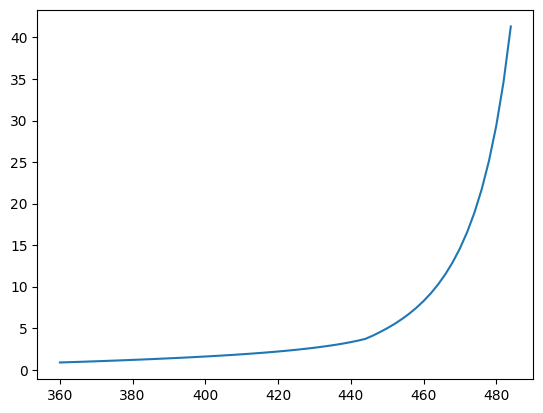

In [17]:
plt.plot( Scls03.T[0], Scls03.T[1] )

In [18]:
pwd

'/mnt/hdd_barracuda/llnl/reweight/spline_cpp'

In [19]:
directory2 = "/mnt/hdd_barracuda/llnl/reweight/data/32b_v12/"

In [20]:
f = h5py.File(directory2+"/m"+mass+"avghist_ibx"+str(0)+"_iby"+str(0)+"_nojkmeas.bin", 'r')

# f2 = h5py.File(basedir + "/m"+mass+"avghist_ibx"+str(iptx)+"_iby"+str(nptsy-ipty-1)+"_nojkmeas.bin")

# fs = f1['f'][:]
# fPs = f1['fP'][:]
# yy1 = np.exp( fs - fPs )

# fs = f2['f'][:]
# fPs = f2['fP'][:]
# yy2 = np.exp( fs - fPs )

# hist_list_.append( 0.5*(yy1+yy2) )
# betas = f1['beta'][:]
#     f1.close()

# ps = f['opt_p'][()]
# xA = f['xA'][()]
# xB = f['xB'][()]

# print(f.keys())
betas = f['beta'][()]

f.close()

In [21]:
ibetac = 508
betac=betas[ibetac]
betac03 = betac

In [22]:
bets03=betas[ibetas]

In [23]:
fitm=0
opt03 = sp.optimize.curve_fit( fff, bets03[fitm:], Scls03.T[1][fitm:], p0=[0.01, 0.01, 0.01] )
opt03

(array([ 2.02197826e+00, -1.76347919e-02,  7.81784435e-05]),
 array([[ 9.17706563e-03, -5.15479718e-05,  5.62857626e-08],
        [-5.15479718e-05,  3.15426523e-07, -3.59979486e-10],
        [ 5.62857626e-08, -3.59979486e-10,  4.32630348e-13]]))

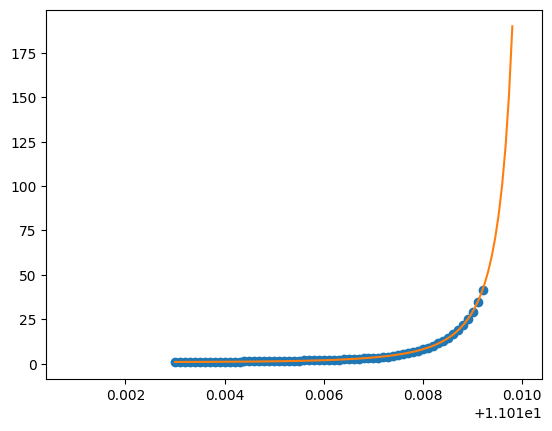

In [24]:
# plt.vlines( betas[ibetac], 0.01, 0.025 )


# plt.plot( bets03, Scls03.T[1], marker='o', ls='none' )

plt.plot( bets03, Scls03.T[1], marker='o', ls='none' )

# plt.xlim( betas[ibetac]-0.01, betas[ibetac] )

# xxx = np.linspace( np.min(bets), betas[ibetac], 100 )

# yyy = quad( xxx, opt03[0][0], opt03[0][1], opt03[0][2] )
# plt.plot( xxx, yyy )

# yyy = quad( xxx, opt03[0][0], opt03[0][1], opt03[0][2] )
# plt.plot( xxx, yyy )

plt.xlim( betas[ibetac]-0.01, betas[ibetac] )

xxx = np.linspace( np.min(bets03), 0.5*(np.max(bets03)+betas[ibetac]), 100 )
yyy = fff( xxx, opt03[0][0], opt03[0][1], opt03[0][2] )
plt.plot( xxx, yyy)

plt.savefig("classical_action.pdf")

In [25]:
mass="0p4000"
directory = "fit_params_32c_m"+mass+"/"

In [26]:
# m=0.4
ibetamin = 700
ibetamax = 808 # 562 # 474

# ibetamin = 756
# ibetamax = 790 # 474

dibeta = 2

ibetas=np.arange(ibetamin,ibetamax, dibeta)

In [27]:
Scls_=[]

# for ibeta in np.arange(416,460+1, 4):
# for ibeta in np.arange(444,464+1, 2):
for ibeta in ibetas:
    scl = np.loadtxt( directory+"Scl_"+str(ibeta)+".dat" )
    Scls_.append([int(ibeta), scl[()] ] )

Scls04 = np.array(Scls_)

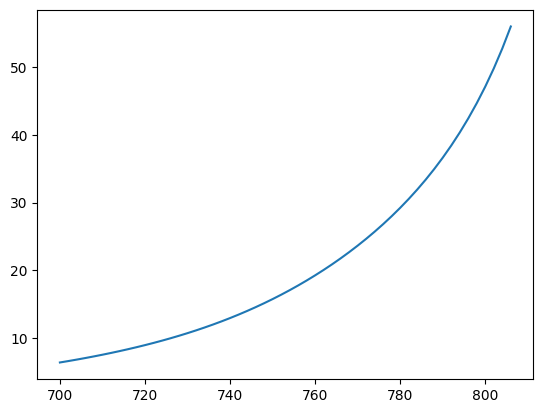

In [28]:
plt.plot( Scls04.T[0], Scls04.T[1] )

In [29]:
pwd

'/mnt/hdd_barracuda/llnl/reweight/spline_cpp'

In [30]:
directory2 = "/mnt/hdd_barracuda/llnl/reweight/data/32b_v12/"

In [31]:
f = h5py.File(directory2+"/m"+mass+"avghist_ibx"+str(0)+"_iby"+str(0)+"_nojkmeas.bin", 'r')

# f2 = h5py.File(basedir + "/m"+mass+"avghist_ibx"+str(iptx)+"_iby"+str(nptsy-ipty-1)+"_nojkmeas.bin")

# fs = f1['f'][:]
# fPs = f1['fP'][:]
# yy1 = np.exp( fs - fPs )

# fs = f2['f'][:]
# fPs = f2['fP'][:]
# yy2 = np.exp( fs - fPs )

# hist_list_.append( 0.5*(yy1+yy2) )
# betas = f1['beta'][:]
#     f1.close()

# ps = f['opt_p'][()]
# xA = f['xA'][()]
# xB = f['xB'][()]

# print(f.keys())
betas = f['beta'][()]

f.close()

In [32]:
ibetac = 854
betac=betas[ibetac]
betac04 = betac

In [33]:
bets04=betas[ibetas]

In [34]:
fitm=0
opt04 = sp.optimize.curve_fit( fff, bets04[fitm:], Scls04.T[1][fitm:], p0=[0.01, 0.01, 0.01] )
opt04

(array([-1.29947272e+01,  1.36619273e-01,  7.02900645e-05]),
 array([[ 4.99597267e-02, -4.20487918e-04,  7.91446602e-07],
        [-4.20487918e-04,  3.64262650e-06, -7.00242584e-09],
        [ 7.91446602e-07, -7.00242584e-09,  1.37686666e-11]]))

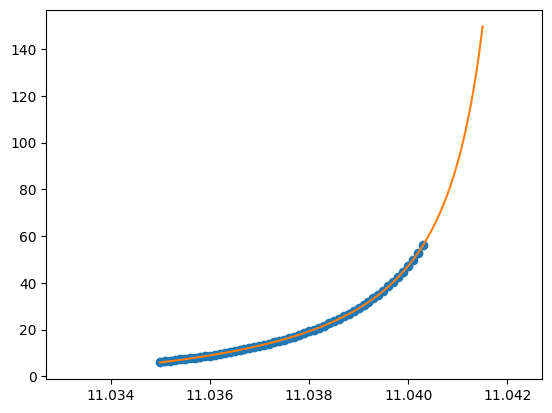

In [35]:
# plt.vlines( betas[ibetac], 0.01, 0.025 )


# plt.plot( bets03, Scls03.T[1], marker='o', ls='none' )

plt.plot( bets04, Scls04.T[1], marker='o', ls='none' )

# plt.xlim( betas[ibetac]-0.01, betas[ibetac] )

# xxx = np.linspace( np.min(bets), betas[ibetac], 100 )

# yyy = quad( xxx, opt03[0][0], opt03[0][1], opt03[0][2] )
# plt.plot( xxx, yyy )

# yyy = quad( xxx, opt04[0][0], opt04[0][1], opt04[0][2] )
# plt.plot( xxx, yyy )

plt.xlim( betas[ibetac]-0.01, betas[ibetac] )

xxx = np.linspace( np.min(bets04), 0.5*(np.max(bets04)+betas[ibetac]), 100 )
yyy = fff( xxx, opt04[0][0], opt04[0][1], opt04[0][2] )
plt.plot( xxx, yyy)

plt.savefig("classical_action.pdf")

In [36]:
opt03

(array([ 2.02197826e+00, -1.76347919e-02,  7.81784435e-05]),
 array([[ 9.17706563e-03, -5.15479718e-05,  5.62857626e-08],
        [-5.15479718e-05,  3.15426523e-07, -3.59979486e-10],
        [ 5.62857626e-08, -3.59979486e-10,  4.32630348e-13]]))

In [37]:
opt04

(array([-1.29947272e+01,  1.36619273e-01,  7.02900645e-05]),
 array([[ 4.99597267e-02, -4.20487918e-04,  7.91446602e-07],
        [-4.20487918e-04,  3.64262650e-06, -7.00242584e-09],
        [ 7.91446602e-07, -7.00242584e-09,  1.37686666e-11]]))

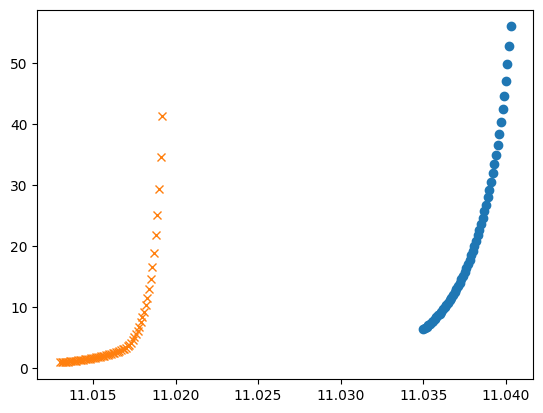

In [38]:
plt.plot( bets04, Scls04.T[1], marker='o', ls='none' )
plt.plot( bets03, Scls03.T[1], marker='x', ls='none' )

In [39]:
def params(mqhat):
    return (opt04[0]-opt03[0])/(0.4-0.3) * (mqhat-0.3) + opt03[0]

def betac_(mqhat):
    return (betac04-betac03)/(0.4-0.3) * (mqhat-0.3) + betac03

(0.0, 80.0)

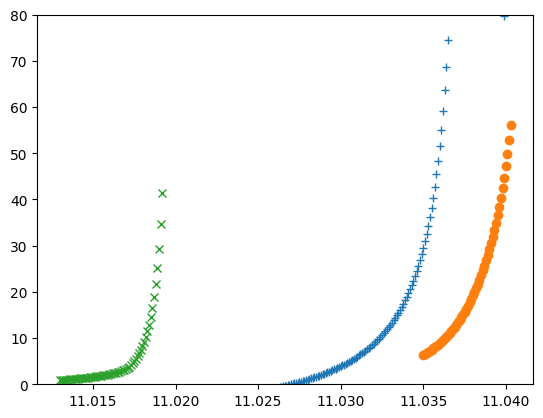

In [48]:
xxxx = np.arange(11.02, 11.04, 0.0001)

mqhat_=0.38
betac = betac_(mqhat_)
opt=params(mqhat_)
plt.plot( xxxx, fff( xxxx, opt[0], opt[1], opt[2] ), marker='+', ls='none' )

plt.plot( bets04, Scls04.T[1], marker='o', ls='none' )
plt.plot( bets03, Scls03.T[1], marker='x', ls='none' )

plt.ylim(0,80)

In [77]:
params(0.4)

array([-1.29947272e+01,  1.36619273e-01,  7.02900645e-05])

In [78]:
opt04[0]

array([-1.29947272e+01,  1.36619273e-01,  7.02900645e-05])

In [23]:
sol[()]

0.015636687425021688

In [19]:
sol.T[0][1:]-sol.T[0][:-1]

array([5.e-05, 5.e-05, 5.e-05, ..., 5.e-05, 5.e-05, 5.e-05])

NameError: name 'ps' is not defined

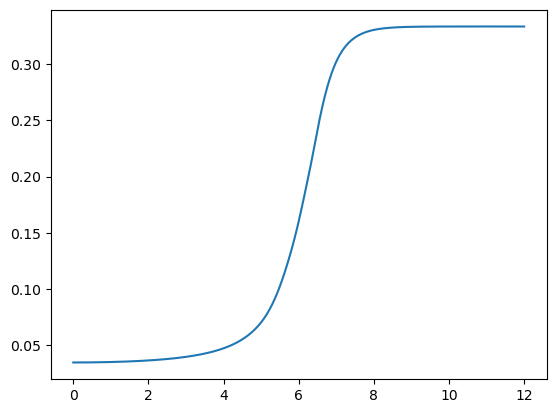

In [17]:
Scls_=[]

# for ibeta in np.arange(416,460+1, 4):
# for ibeta in np.arange(444,464+1, 2):
for ibeta in ibetas:
    sol = np.loadtxt( directory+"sol_"+str(ibeta)+".dat" )
    plt.plot( sol.T[0], sol.T[1] )
    deriv = (sol.T[1][1:]-sol.T[1][:-1])/(sol.T[0][1:]-sol.T[0][:-1])

    # f = h5py.File(directory+str(ibeta)+".h5", 'r')
    # ps = f['opt_p'][()]
    # xA = f['xA'][()]
    # xB = f['xB'][()]
    # f.close()
    
    xs = (sol.T[1][1:]+sol.T[1][:-1])/2.0
    Vs = V(xs)

    integrand=xs**2 * sol.T[0][1] * (deriv**2 + Vs)
    # plt.plot( integrand )
    
    Scl = 4.0*np.pi * np.sum( integrand )

    Scls_.append([int(ibeta), Scl])

Scls04 = np.array(Scls_)

In [18]:
plt.plot( sol )

array([[0.00000000e+00, 3.48217641e-02],
       [5.00000000e-05, 3.48217629e-02],
       [1.00000000e-04, 3.48217626e-02],
       ...,
       [1.19998500e+01, 3.33222147e-01],
       [1.19999000e+01, 3.33222143e-01],
       [1.19999500e+01, 3.33222139e-01]])

In [282]:
f = h5py.File(directory+str(ibeta)+".h5", 'r')
ps = f['opt_p'][()]
xA = f['xA'][()]
xB = f['xB'][()]

print(f.keys())
betas = f['betas'][()]
ibetac = f['ibetac'][()]

f.close()

<KeysViewHDF5 ['betas', 'ibeta', 'ibetac', 'ixA', 'ixB', 'latsize', 'mass', 'opt_p', 'xA', 'xB']>


In [283]:
ibeta_star04 = np.argmin( (betas-11.0182)**2 )

In [284]:
ibeta_star04

364

In [285]:
bets04 = np.array([betas[int(ibeta)] for ibeta in Scls04.T[0]])

In [286]:
betac = betas[ibetac]

In [287]:
fitm=0
opt04 = sp.optimize.curve_fit( fff, bets04[fitm:], Scls04.T[1][fitm:], p0=[0.01, 0.01, 0.01] )
opt04

/tmp/ipykernel_172231/3628923751.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  opt04 = sp.optimize.curve_fit( fff, bets04[fitm:], Scls04.T[1][fitm:], p0=[0.01, 0.01, 0.01] )


(array([2.91082137e-02, 1.00000000e-02, 1.47151661e-07]),
 array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

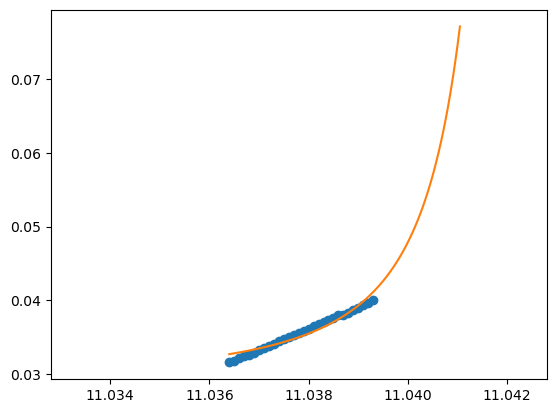

In [288]:
# plt.vlines( betas[ibetac], 0.01, 0.025 )


# plt.plot( bets03, Scls03.T[1], marker='o', ls='none' )

plt.plot( bets04, Scls04.T[1], marker='o', ls='none' )

# plt.xlim( betas[ibetac]-0.01, betas[ibetac] )

# xxx = np.linspace( np.min(bets), betas[ibetac], 100 )

# yyy = quad( xxx, opt03[0][0], opt03[0][1], opt03[0][2] )
# plt.plot( xxx, yyy )

# yyy = quad( xxx, opt04[0][0], opt04[0][1], opt04[0][2] )
# plt.plot( xxx, yyy )

plt.xlim( betas[ibetac]-0.01, betas[ibetac] )

xxx = np.linspace( np.min(bets04), 0.5*(np.max(bets04)+betas[ibetac]), 100 )
yyy = fff( xxx, opt04[0][0], opt04[0][1], opt04[0][2] )
plt.plot( xxx, yyy)

plt.savefig("classical_action.pdf")

In [172]:
S3 = Scls03.T[1]

In [173]:
S3

array([0.00572853, 0.00575954, 0.00579245, 0.00582524, 0.00581637,
       0.00585765, 0.00590121, 0.00594731, 0.00599726, 0.00605169,
       0.00611105, 0.00615149, 0.00622556, 0.00630612, 0.00639341,
       0.00648877, 0.00659291, 0.00671216, 0.00684331, 0.00698842,
       0.0071692 , 0.007356  , 0.00756731])

In [109]:
np.exp( -S3 )

array([0.99428784, 0.99425701, 0.99422429, 0.99419169, 0.99420051,
       0.99415947, 0.99411617, 0.99407034, 0.99402069, 0.99396658,
       0.99390758, 0.99386739, 0.99379378, 0.99371372, 0.99362699,
       0.99353224, 0.99342878, 0.99331032, 0.99318005, 0.99303594,
       0.99285643, 0.99267099, 0.99246125])

In [90]:
(S3/(2.0*np.pi))**(1.5)

array([2.75293120e-05, 2.77531413e-05, 2.79913310e-05, 2.82293824e-05,
       2.81649299e-05, 2.84652917e-05, 2.87833461e-05, 2.91213383e-05,
       2.94889505e-05, 2.98913292e-05, 3.03322294e-05, 3.06338205e-05,
       3.11887660e-05, 3.17960724e-05, 3.24585068e-05, 3.31874365e-05,
       3.39895525e-05, 3.49159042e-05, 3.59442519e-05, 3.70935708e-05,
       3.85422164e-05, 4.00582854e-05, 4.17967182e-05])

In [91]:
(S3/(2.0*np.pi))**(1.5) * np.exp( -S3 )

array([2.73720602e-05, 2.75937553e-05, 2.78296613e-05, 2.80654174e-05,
       2.80015876e-05, 2.82990393e-05, 2.86139898e-05, 2.89486586e-05,
       2.93126269e-05, 2.97109824e-05, 3.01474328e-05, 3.04459552e-05,
       3.09952015e-05, 3.15961934e-05, 3.22516484e-05, 3.29727880e-05,
       3.37661997e-05, 3.46823280e-05, 3.56991140e-05, 3.68352490e-05,
       3.82668875e-05, 3.97646980e-05, 4.14816234e-05])

In [42]:
Sdbeta03 = quad( betas[ibeta_star03], opt03[0][0], opt03[0][1], opt03[0][2] )
Sdbeta04 = quad( betas[ibeta_star03], opt04[0][0], opt04[0][1], opt04[0][2] )

In [43]:
Sdbeta03, Sdbeta04

(0.052404794035282976, 0.027415945382017526)

In [35]:
dSdbeta03 = dquad( betas[ibeta_star03], opt03[0][0], opt03[0][1], opt03[0][2] )
np.savetxt( "dSdbeta_mass0.3.dat", [dSdbeta03] )

In [45]:
Sdbeta03 = quad( betas[ibeta_star03], opt03[0][0], opt03[0][1], opt03[0][2] )
Sdbeta04 = quad( betas[ibeta_star03], opt04[0][0], opt04[0][1], opt04[0][2] )

In [46]:
dSdmhat = (Sdbeta04-Sdbeta03)/0.1
np.savetxt( "dSdmhat.dat", [dSdmhat] )

In [48]:
Sdbeta03, dSdmhat

(0.052404794035282976, -0.2498884865326545)

In [ ]:
aaa

In [14]:
def fitter( x, CA, CB, alphaA, alphaB, gammaA, gammaB, vol=(Ns/Nt)**3 ):
    VA = 0.5*alphaA * (x-xA)**2 + 0.25*gammaA * (x-xA)**4
    VB = 0.5*alphaB * (x-xB)**2 + 0.25*gammaB * (x-xB)**4
    return CA * np.exp( - vol * VA ) + CB * np.exp( - vol * VB )

In [15]:
def dfitter( x, CA, CB, alphaA, alphaB, gammaA, gammaB, vol=(Ns/Nt)**3 ):
    VA = 0.5*alphaA * (x-xA)**2 + 0.25*gammaA * (x-xA)**4
    dVA = alphaA * (x-xA) + gammaA * (x-xA)**3
    VB = 0.5*alphaB * (x-xB)**2 + 0.25*gammaB * (x-xB)**4
    dVB = alphaB * (x-xB) + gammaB * (x-xB)**3
    return - vol * ( CA * np.exp( - vol * VA )*dVA + CB * np.exp( - vol * VB )*dVB )

In [16]:
xs = np.linspace( -0.2, 0.6, 100 )

In [17]:
def V(x):
    return -1.0/(Ns/Nt)**3 * np.log( fitter(x, ps[0], ps[1], ps[2], ps[3], ps[4], ps[5]) )

In [18]:
def dV(x):
    ppp = fitter(x, ps[0], ps[1], ps[2], ps[3], ps[4], ps[5])
    dppp = dfitter(x, ps[0], ps[1], ps[2], ps[3], ps[4], ps[5])
    return -1.0/(Ns/Nt)**3 * dppp/ppp

In [19]:
directory = "fit_params_32c_m0.3/"

<KeysViewHDF5 ['betas', 'ibeta', 'ibetac', 'ixA', 'ixB', 'latsize', 'mass', 'opt_p', 'xA', 'xB']>
[ 65.6552023   31.47234506   6.79791055   3.50399785   5.97102382
 319.33486609] 0.06915124137551525 0.3245952138249781


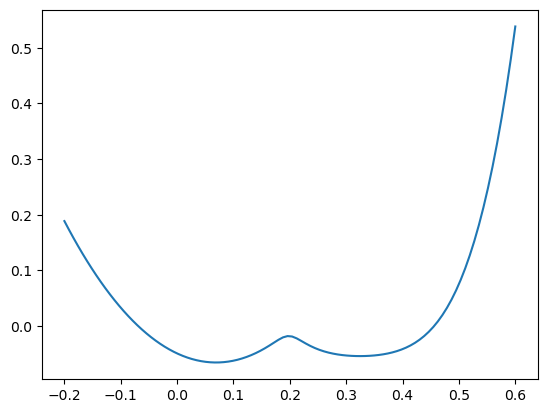

In [20]:
ibeta =450 # in np.arang(450, 504):
f = h5py.File(directory+str(ibeta)+".dat", 'r')

print( f.keys() )
ps = f['opt_p'][()]
xA = f['xA'][()]
xB = f['xB'][()]
print( ps, xA, xB )

ys = V(xs)
plt.plot( xs, ys )
plt.show()

f.close()

In [22]:
def force(t, p, q):
    return -2.0/t * p + 0.5*dV(q)

In [23]:
def leapfrog(p, q, t, tau):
    p_half = p + 0.5 * tau * force(t+0.5*tau, p, q)
    p_half_old = p_half
    for i in range(10):
        p_half = p + 0.5 * tau * force(t+0.5*tau, p_half, q)
        if np.sqrt((p_half-p_half_old)**2)<1.0e-10:
            break
        p_half_old = p_half
    q_prime = q + tau * p_half
    p_prime = p_half + 0.5 * tau * force(t+0.5*tau, p_half, q)

    return p_prime, q_prime

In [24]:
def integrate( p_init_, q_init_, tau=0.1e-2, tmax=250. ):
    nsteps = int(tmax/tau)
    solution_ = []
    p = p_init_
    q = q_init_
    for i in np.arange(nsteps):
        t = i*tau
        p, q = leapfrog(p, q, t, tau)
        solution_.append( [t, q] )
    sol = np.array( solution_ )
    return sol

In [25]:
def cost( q_init ):
    p_init = 0.0
    sol = integrate( p_init, q_init )
    return sol.T[1][-1] - xB

In [95]:
q_inits = []
sols = []

tmax=250
p_init = 0.0
q_init = xA+0.125*10**(-6)

In [96]:
ibeta = 450
print(ibeta)
f = h5py.File(directory+str(ibeta)+".dat", 'r')    
ps = f['opt_p'][()]
xA = f['xA'][()]
xB = f['xB'][()]

p_init = 0.0
sol = integrate( p_init, q_init, tau=0.1e-3, tmax=20. )

450


/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_3661/3835970665.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return -1.0/(Ns/Nt)**3 * dppp/ppp


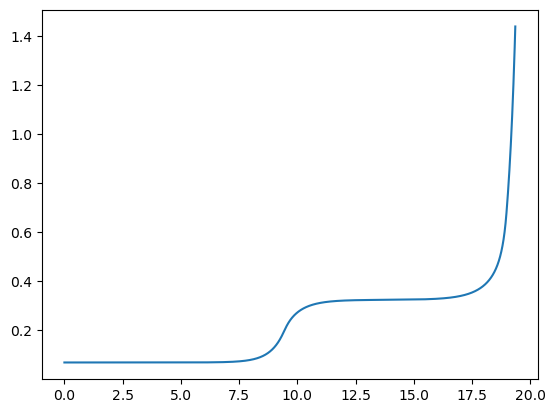

In [97]:
plt.plot( sol.T[0], sol.T[1] )

In [27]:
ibeta = 450
print(ibeta)
f = h5py.File(directory+str(ibeta)+".dat", 'r')    
ps = f['opt_p'][()]
xA = f['xA'][()]
xB = f['xB'][()]

a0 = xA + (q_init-xA) - 10**(-8)
b0 = xA + (q_init-xA) + 10**(-8)    
for i in range(20):
    ca0 = cost( a0 )
    cb0 = cost( b0 )
    if ca0 * cb0 < 0: break
    a0 -= 2.*10**(-8)
    b0 -= 2.*10**(-8)

q_init = sp.optimize.bisect( cost, a=a0, b=b0 )
q_inits.append(q_init)

sol = integrate( p_init, q_init )

450


/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_3661/3835970665.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return -1.0/(Ns/Nt)**3 * dppp/ppp

KeyboardInterrupt



In [17]:
a0, b0

(0.06915135587551526, 0.06915137587551524)

In [19]:
ca0, cb0

(0.19004353666051038, -0.1601842770358975)

In [ ]:
plt.plot( sol.T[0], sol.T[1] )
plt.hlines( (xA, xB), 0.0, tmax, ls='dashed' )

In [48]:
for ibeta in np.arange(450, 504, 10):
    print(ibeta)
    f = h5py.File(directory+str(ibeta)+".dat", 'r')    
    ps = f['opt_p'][()]
    xA = f['xA'][()]
    xB = f['xB'][()]

    a0 = xA + (q_init-xA) - 10**(-8)
    b0 = xA + (q_init-xA) + 10**(-8)    
    for i in range(20):
        ca0 = cost( a0 )
        cb0 = cost( b0 )
        if ca0 * cb0 < 0: break
        a0 -= 2.*10**(-8)
        b0 -= 2.*10**(-8)

    q_init = sp.optimize.bisect( cost, a=a0, b=b0 )
    q_inits.append(q_init)

    sol = integrate( p_init, q_init )
    sols.append(sol)

450
460


ValueError: f(a) and f(b) must have different signs

In [44]:
cost( a0 ), cost( b0+10 )

(-0.11266549747020219, -0.11266664548470914)

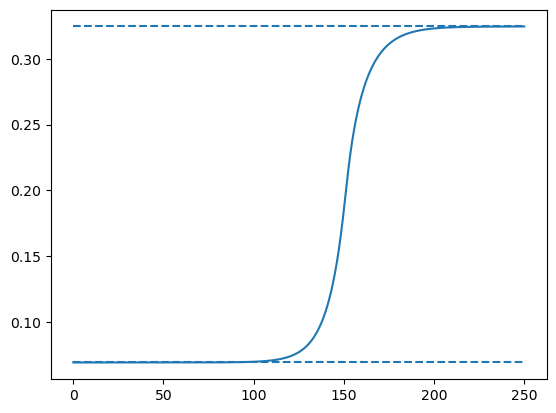

In [40]:
plt.plot( sol.T[0], sol.T[1] )
plt.hlines( (xA, xB), 0.0, tmax, ls='dashed' )

In [450]:
# sol = sp.integrate.solve_ivp( fun, (eps, tmax), y_init, method="RK45", rtol=1e-5, atol=1e-10 )

# plt.plot( sol.t, sol.y[1] )

In [452]:
ts = sol.T[0]
ys = sol.T[1]

In [454]:
dts = (ts[1:] - ts[:-1])
dys = (ys[1:] - ys[:-1])

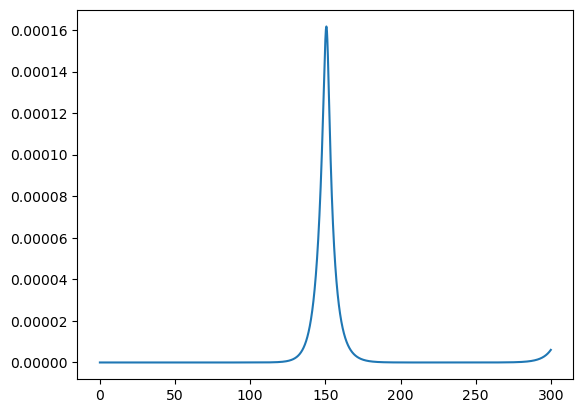

In [455]:
plt.plot( ts[:-1], dys**2 / dts**2 )

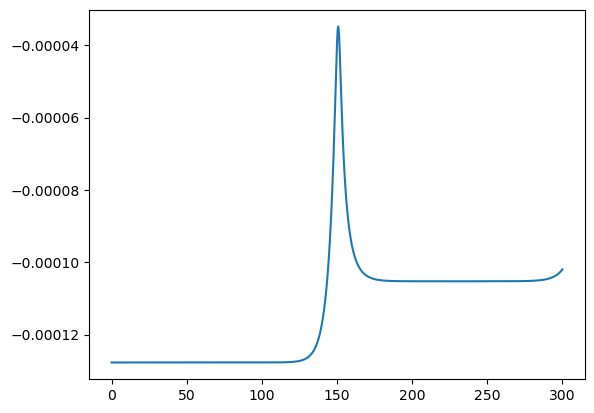

In [456]:
plt.plot( ts, V( ys ) )

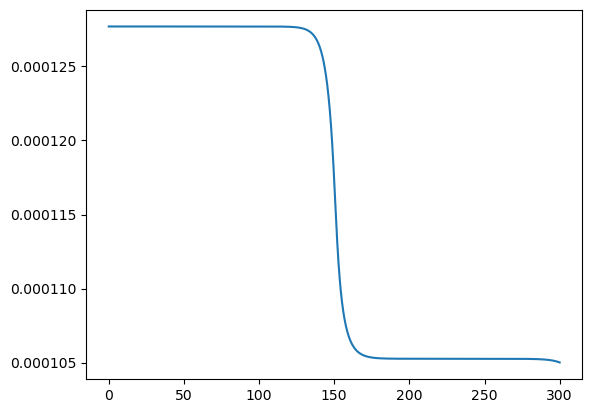

In [457]:
plt.plot( ts[:-1], 0.5*dys**2 / dts**2 - V( ys[:-1] ) )

In [277]:
xs

array([-0.2       , -0.19191919, -0.18383838, -0.17575758, -0.16767677,
       -0.15959596, -0.15151515, -0.14343434, -0.13535354, -0.12727273,
       -0.11919192, -0.11111111, -0.1030303 , -0.09494949, -0.08686869,
       -0.07878788, -0.07070707, -0.06262626, -0.05454545, -0.04646465,
       -0.03838384, -0.03030303, -0.02222222, -0.01414141, -0.00606061,
        0.0020202 ,  0.01010101,  0.01818182,  0.02626263,  0.03434343,
        0.04242424,  0.05050505,  0.05858586,  0.06666667,  0.07474747,
        0.08282828,  0.09090909,  0.0989899 ,  0.10707071,  0.11515152,
        0.12323232,  0.13131313,  0.13939394,  0.14747475,  0.15555556,
        0.16363636,  0.17171717,  0.17979798,  0.18787879,  0.1959596 ,
        0.2040404 ,  0.21212121,  0.22020202,  0.22828283,  0.23636364,
        0.24444444,  0.25252525,  0.26060606,  0.26868687,  0.27676768,
        0.28484848,  0.29292929,  0.3010101 ,  0.30909091,  0.31717172,
        0.32525253,  0.33333333,  0.34141414,  0.34949495,  0.35

In [278]:
V(xs)

array([ 3.68517167e-04,  3.38316978e-04,  3.09139520e-04,  2.80975302e-04,
        2.53815132e-04,  2.27650116e-04,  2.02471661e-04,  1.78271467e-04,
        1.55041538e-04,  1.32774173e-04,  1.11461970e-04,  9.10978264e-05,
        7.16749366e-05,  5.31867940e-05,  3.56271905e-05,  1.89902162e-05,
        3.27025950e-06, -1.15379927e-05, -2.54395552e-05, -3.84391445e-05,
       -5.05411785e-05, -6.17497771e-05, -7.20687614e-05, -8.15016546e-05,
       -9.00516811e-05, -9.77217671e-05, -1.04514541e-04, -1.10432331e-04,
       -1.15477170e-04, -1.19650789e-04, -1.22954624e-04, -1.25389809e-04,
       -1.26957184e-04, -1.27657287e-04, -1.27490359e-04, -1.26456342e-04,
       -1.24554882e-04, -1.21785323e-04, -1.18146714e-04, -1.13637810e-04,
       -1.08257105e-04, -1.02002989e-04, -9.48745177e-05, -8.68745072e-05,
       -7.80207409e-05, -6.83821565e-05, -5.81831815e-05, -4.80610035e-05,
       -3.95172523e-05, -3.50457469e-05, -3.65424110e-05, -4.30812046e-05,
       -5.19771439e-05, -

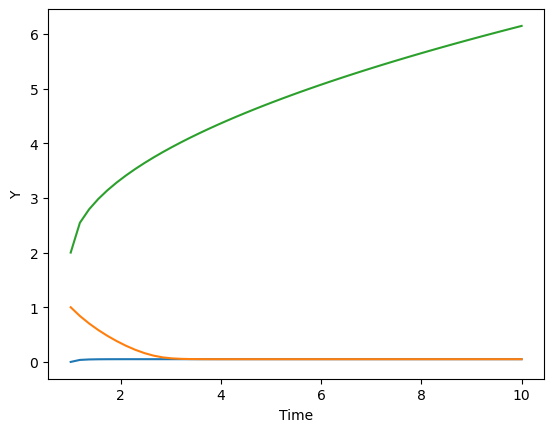

In [8]:
# Initial conditions
y0 = [0, 1, 2]

# Time values
t = np.linspace(1, 10)

# Define the ODE using lambda
dydt = lambda y, t: (1 - y) / (1.95 - y) - y / (0.05 + y)

# Solve the ODE
y = odeint(dydt, y0, t)

plt.plot(t, y)
plt.xlabel("Time")
plt.ylabel("Y")
plt.show()